## Section B. Prediction Uncertainty with Bootstrapping

### Question 3 [Bootstrapping, 20 Marks]

In [1]:
# Load the libraries for wrangling and plotting data
library(reshape)
library(ggplot2)

Warning message:
"package 'reshape' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"

1. Modify the code in Activity 2 to handle bootstrapping for KNN regression.

2. Load Task1B_train.csv and Task1B_test.csv sets. Apply your
    bootstrapping for KNN regression with times = 100 (the number of
    subsets), size = 25 (the size of each subset), and change K=1,..,20 (the
    neighbourhood size). Now create a boxplot where the x-axis is K , and the
    y-axis is the average error (and the uncertainty around it) corresponding to
    each K . Save the plot in your Jupyter Notebook file for Question 3.

In [2]:
# Load the train and the test set for task 1B
train_B <- read.csv("Task1B_train.csv")
test_B <- read.csv("Task1B_test.csv")

# Split the data into input values and corresponding labels
train_B.data <- train_B[,-5]
train_B.label <- train_B[, 5]

test_B.data <- test_B[, -5]
test_B.label <- test_B[, 5]

Define a function that generates sample indixes based on bootstrap technique

In [4]:
# Function to generate sample indices using bootstrapping
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

#just to see if it works!
boot(100, 50, 2)

67,60,97,71,76,54,26,97,99,94,...,41,79,75,82,62,39,21,45,99,81
68,89,11,97,95,36,96,17,21,38,...,19,7,46,42,46,52,69,78,59,30


In [7]:
# KNN function to return the k nearest elements using euclidean distance
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # Initialize the predicted value vector
    test.label <- 0.0
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]  # returns indices of 4 nearest neighbours
                
        ###... and calculate the predicted labels according to the majority vote
        
        avg <- mean(train.label[nn])
        
        test.label[i]<- round(avg, 2)

    }
    
    ## return the class labels as output
    return (test.label)
}

In [8]:
# Create 100 datasets of size 25 from a training set of size 42 for k=1 to 20
K <- 20           # Maximum K for KNN 
N <- 25          # size of a dataset (1 row is a datset)
L <- 100          # number of datasets

# Generate indices for l=100 datasets  from the dataset of length nrow(train_B.data)
boot.indx <- boot(nrow(train_B.data), N, L)

# a dataframe to track the RMSE value of each dataset
rmse_boot <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        rmse_boot[i,'K'] <- k
        rmse_boot[i,'L'] <- l
        
        # Predict the k nearest neighbours for each dataset from 1 to L
        predicted.test_B <- knn(train_B.data[indx,], train_B.label[indx], test_B.data, K=k)
        
        # Store the RMSE for each dataset
        rmse_boot[i,'test'] <- sqrt(mean((predicted.test_B - test_B.label)^2))
    } 
}

In [9]:
# Check the top 5 results to verify the dataframe
head(rmse_boot)

K,L,test
1,1,218.1670
1,2,185.2063
1,3,237.3883
1,4,182.5515
1,5,152.8082
1,6,153.7766


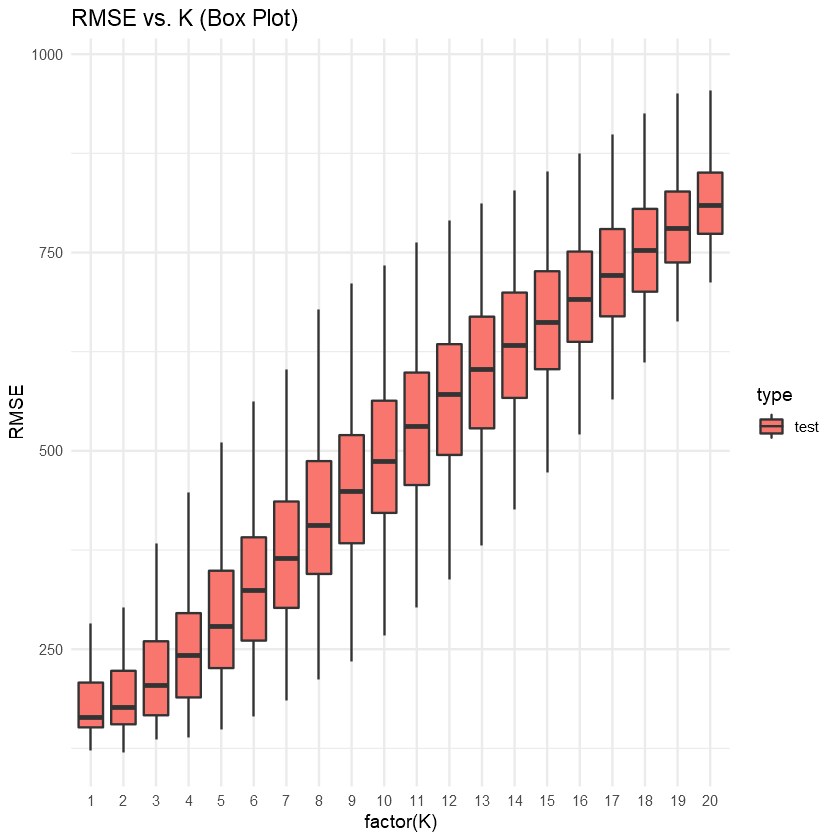

In [10]:
# reshape for visualization
rmse_boot.m <- melt(rmse_boot, id=c('K', 'L')) 
names(rmse_boot.m) <- c('K', 'L', 'type', 'RMSE')

# Boxplot where the x-axis is K , and the y-axis is the average error
ggplot(data=rmse_boot.m[rmse_boot.m$type=='test',], aes(factor(K), RMSE,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('RMSE vs. K (Box Plot)') + theme_minimal()

# ignore the warnings (because of ignoring outliers)
options(warn=-1)

3. Based on the plot in the previous part (Part I), how does the test error and its uncertainty behave as K increases?
<br>

**Answer:**
* The plot in the previous part compares the RMSE of test data with the values of K nearest neighbours.
* From the plot, it can be observed that as the value of k increases, the median of error and the uncertainity around it also increases. 
* Initially the median error is very low for K=1 to 3. When the value of K reaches 10, the median of error continues to increase, however, the uncertainity around it gradually decrease.
* This variability in the graph may be a result of very small sample sizes compared to the total size of the original sample.

4. Apply your bootstrapping for KNN regression with K=10 (the neighbourhood size),
size = 25 (the size of each subset), and change times = 10, 20, 30,.., 200
(the number of subsets). Now create a boxplot where the x-axis is ‘times’,
and the y-axis is the average error (and the uncertainty around it)
corresponding to each value of ‘times’. Save the plot in your Jupyter
Notebook file for Question 3.

In [11]:
# Create datasets of with change times from 10 to 200 (ie 10,20,30...200)
K <- 10           # Maximum K for KNN 
N <- 25          # size of a dataset (1 row is a datset)

# Change times 10, 20, 30,.., 200 (the number of subsets)
change_times <- seq(from = 10, to = 200, by = 10)
          

# Create 50 datasets (indices) of size 42 from a training set of size 42 for k=1 to 20
boot.indx <- boot(nrow(train_B.data), N, 200)

# a dataframe to track the average error corresponding to each value of times
rmse_boot_4 <- data.frame()

# Initialize the counter x = 0
x = 0

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (ct in change_times){
   
    ### for every dataset:
    for (l in 1:ct){
        
        #### calculate iteration index i. i increments by change time ct with every iteration
        i <- x + l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        rmse_boot_4[i,'Change_Times'] <- ct
        rmse_boot_4[i,'L'] <- l
        
        # Predict the k nearest neighbours for each dataset from 1 to L
        predicted.test_B <- knn(train_B.data[indx,], train_B.label[indx], test_B.data, K=10)
        
        # Store the RMSE for each dataset
        rmse_boot_4[i,'test'] <- sqrt(mean((predicted.test_B - test_B.label)^2))
    } 
    
    # Increment counter by the size of the change time
    x <- x+ct
}

# Verify using initial values of the dataframe
head(rmse_boot_4)

Change_Times,L,test
10,1,309.2523
10,2,529.6757
10,3,377.3661
10,4,335.9228
10,5,533.3893
10,6,376.8499


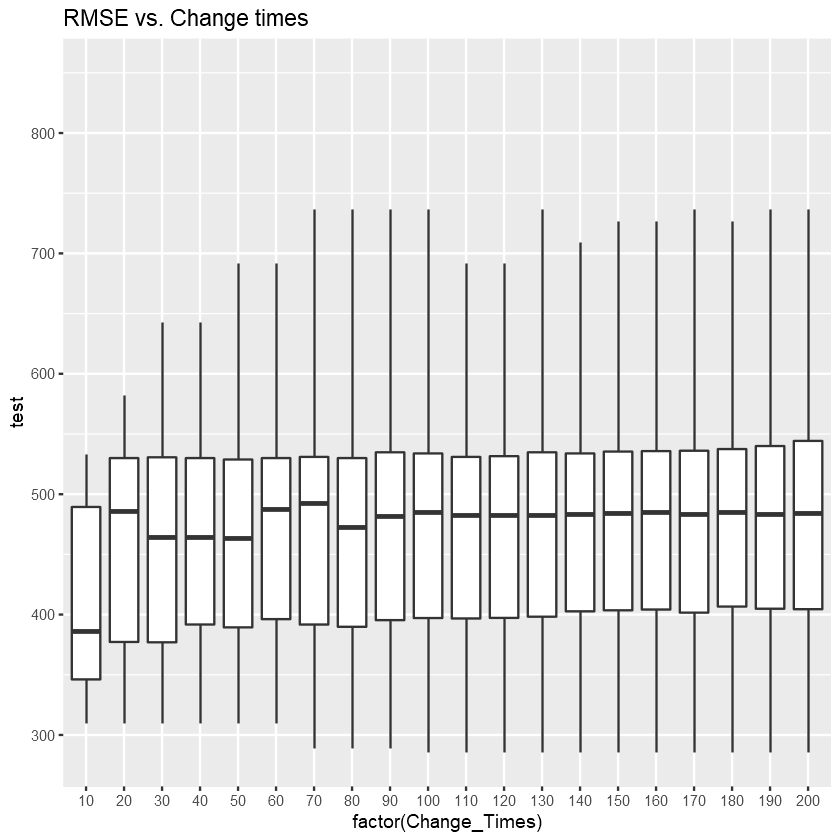

In [12]:
# boxplot where the x-axis is ‘change times’, and the y-axis is the average error 
ggplot(data = rmse_boot_4, aes(x = factor(Change_Times), y = test)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('RMSE vs. Change times') + theme_grey()

# ignore the warnings (because of ignoring outliers)
options(warn=-1)

5. Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases?
<br>

**Answer:**
* The plot in the previous part analyses the error in the test dataset with the change in the size of data subsets.
* Based on the plot, it can be interpreted that there is some variability in the median of test errors till the size of the subset is less than 90. However, as the subset size increases beyond 90, the median test error becomes almost constant. 
* The upper and lower quartiles are almost constant with respect to every dataset beyond subset size 90.
* Thus, the median error of test values become constant beyond a particular subset size. In conclusion, the average error in the test size becomes stable with increase in sample subset size.
